In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

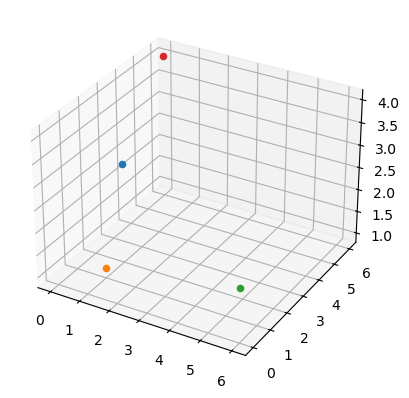

(array([1, 2, 3]), array([1, 1, 1]))
Расстояние Евклида 2.23606797749979
Расстояние Евклида 5.000000000000001
Расстояние Чебышева 2.0
Расстояние Хемминга 3.0

(array([1, 2, 3]), array([6, 0, 2]))
Расстояние Евклида 5.477225575051661
Расстояние Евклида 30.0
Расстояние Чебышева 5.0
Расстояние Хемминга 8.0

(array([1, 2, 3]), array([0, 6, 4]))
Расстояние Евклида 4.242640687119285
Расстояние Евклида 17.999999999999996
Расстояние Чебышева 4.0
Расстояние Хемминга 6.0

(array([1, 1, 1]), array([6, 0, 2]))
Расстояние Евклида 5.196152422706632
Расстояние Евклида 27.0
Расстояние Чебышева 5.0
Расстояние Хемминга 7.0

(array([1, 1, 1]), array([0, 6, 4]))
Расстояние Евклида 5.916079783099616
Расстояние Евклида 35.0
Расстояние Чебышева 5.0
Расстояние Хемминга 9.0

(array([6, 0, 2]), array([0, 6, 4]))
Расстояние Евклида 8.717797887081348
Расстояние Евклида 76.00000000000001
Расстояние Чебышева 6.0
Расстояние Хемминга 14.0



In [ ]:
"""
№ 1.3.1 Задание
Задайте 4 точки в трехмерном пространстве, рассчитайте между ними 
расстояния по описанным в примере выше метрикам. Отобразите точки 
в трехмерном пространстве.
"""
from itertools import combinations

a = np.array([1,2,3])
b = np.array([1,1,1])
c = np.array([6,0,2])
d = np.array([0,6,4])

fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')

for p in [a,b,c,d]:
    ax.scatter(*p)
plt.show()

for c in combinations([a,b,c,d],r=2):
    print(c)
    print("Расстояние Евклида", np.linalg.norm(c[0]-c[1]))
    print("Расстояние Евклида",np.linalg.norm(c[0]-c[1])**2)
    print("Расстояние Чебышева",np.linalg.norm(c[0]-c[1],ord=np.inf))
    print("Расстояние Хемминга",np.linalg.norm(c[0]-c[1],ord=1))
    print()

In [ ]:
"""
1.3.2
Создать 5x5 матрицу со значениями в строках от 0 до 4. Для создания 
необходимо использовать функцию arange.
"""

Z = np.zeros((5,5))
Z += np.arange(5)
print(Z)

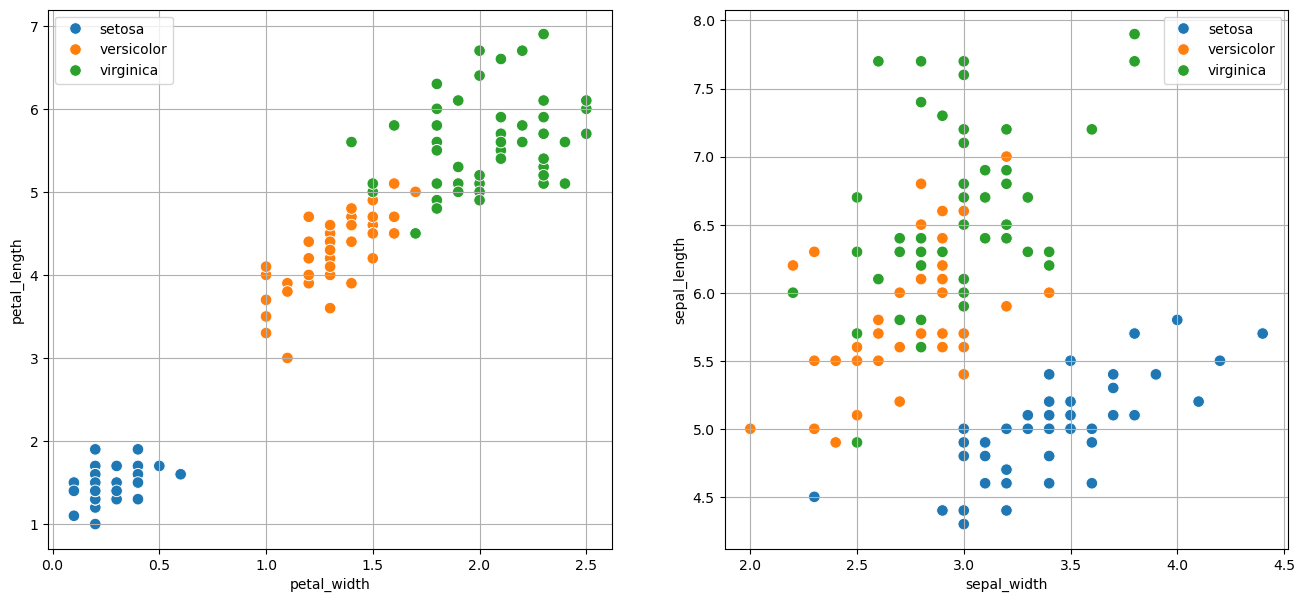

In [ ]:
"""
2.3.1
Для  предыдущего  примера  поэкспериментируйте  с  параметрами 
классификатора: 
1.  Установите другое количество ближайших соседей (k = 1, 5, 10). 
2.  Установите размер тестовой выборки 15% от всего датасета. 
3.  Постройте графики и оцените качество моделей, проанализируйте 
результаты
"""
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
iris = sns.load_dataset('iris')

plt.figure(figsize=(16,7))

plt.subplot(121)
sns.scatterplot(data=iris,x="petal_width",y="petal_length",hue="species",s=70)
plt.legend()
plt.grid()

plt.subplot(122)
sns.scatterplot(data=iris,x="sepal_width",y="sepal_length",hue="species",s=70)
plt.legend()
plt.grid()

accuracy: 1.0


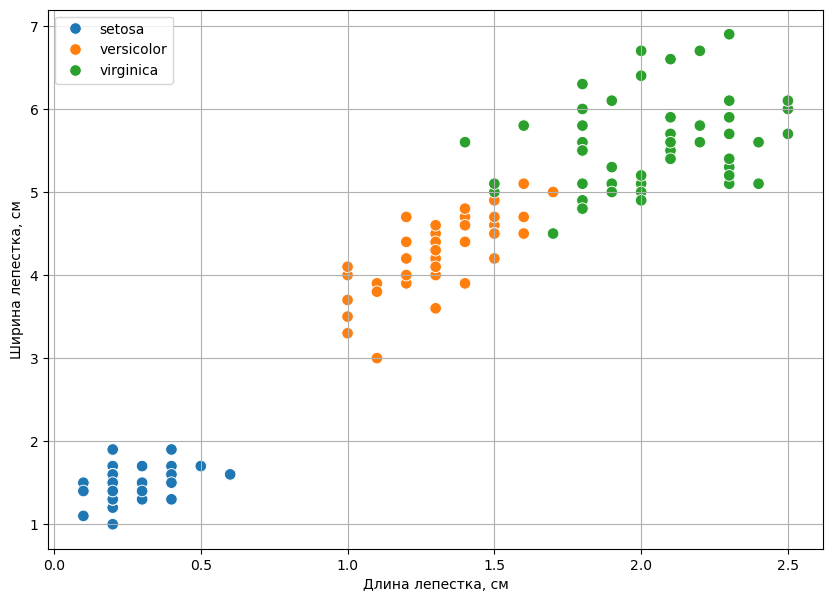

In [ ]:
"""
2.3.1
Для  предыдущего  примера  поэкспериментируйте  с  параметрами 
классификатора: 
1.  Установите другое количество ближайших соседей (k = 1, 5, 10). 
2.  Установите размер тестовой выборки 15% от всего датасета. 
3.  Постройте графики и оцените качество моделей, проанализируйте 
результаты
"""

from sklearn.model_selection import train_test_split
PARAMS = { "k": 15, "percentage": 0.15 }

X_train, X_test, y_train, y_test = train_test_split(
    iris.iloc[:,:-1],iris.iloc[:,-1],test_size=PARAMS["percentage"]
)

model = KNeighborsClassifier(n_neighbors=PARAMS["k"])
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

plt.figure(figsize=(10, 7))
sns.scatterplot(x='petal_width', y='petal_length', data=iris, hue='species',
s=70)
plt.xlabel('Длина лепестка, см')
plt.ylabel('Ширина лепестка, см')
plt.legend(loc=2)
plt.grid()

for i in range(len(y_test)):
    if np.array(y_test)[i] != y_pred[i]:
        plt.scatter(X_test.iloc[i, 3], X_test.iloc[i, 2], color='red', s=150)
        
from sklearn.metrics import accuracy_score
print(f'accuracy: {accuracy_score(y_test, y_pred) :.3}')

In [35]:
"""
3.3.2
Определите набор признаков человека, по аналогии из РТ 1, – например, 
цвет глаз и конвертируйте его в матрицу признаков.
"""
from sklearn.feature_extraction import DictVectorizer

eye_color_data = [
    {
        "голубой": 25,
        "зеленый": 12,
        "серо-голубой": 18,
        "серо-зеленый": 10,
        "коричневый": 20,
        "серый": 8,
        "фисташковый": 7
    },
    {
        "голубой": 22,
        "зеленый": 15,
        "серо-голубой": 16,
        "серо-зеленый": 9,
        "коричневый": 23,
        "серый": 10,
        "фисташковый": 5
    },
    {
        "голубой": 28,
        "зеленый": 10,
        "серо-голубой": 14,
        "серо-зеленый": 11,
        "коричневый": 19,
        "серый": 12,
        "фисташковый": 6
    },
    {
        "голубой": 20,
        "зеленый": 14,
        "серо-голубой": 17,
        "серо-зеленый": 8,
        "коричневый": 25,
        "серый": 9,
        "фисташковый": 7
    },
    {
        "голубой": 26,
        "зеленый": 11,
        "серо-голубой": 15,
        "серо-зеленый": 12,
        "коричневый": 21,
        "серый": 7,
        "фисташковый": 8
    }
]

DV = DictVectorizer(sparse=False)
features = DV.fit_transform(eye_color_data)
print(features)

[[25. 12. 20. 18. 10.  8.  7.]
 [22. 15. 23. 16.  9. 10.  5.]
 [28. 10. 19. 14. 11. 12.  6.]
 [20. 14. 25. 17.  8.  9.  7.]
 [26. 11. 21. 15. 12.  7.  8.]]
